# MNIST 손글씨 이미지 분류

MNIST 데이터셋은 위 그림과 같이 0에서 9까지 10가지로 분류될 수 있는 손글씨 숫자 이미지 70,000개로 이루어져 있습니다.

각 이미지는 28×28 픽셀로 구성되고 각 픽셀은 아래와 같이 0~255 사이의 숫자 행렬로 표현됩니다.

이러한 60,000개의 이미지는 인공 신경망의 훈련 (Training)에 사용되고, 10,000개의 이미지는 테스트 (Test)에 사용됩니다.

이번 페이지에서는 Dense 층들로 구성되는 완전 연결된 인공신경망 (Fully-Connected Neural Network)을 이용해서 MNIST 데이터셋을 분류해 보겠습니다.



In [ ]:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201  78   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

In [ ]:
!pip install tensorflow

tensorflow에서 직접 MNIST 손글씨 이미지 데이터셋을 불러와서 사용합니다.

load_data() 함수는 x_train, y_train, x_test, y_test 네 개의 NumPy 어레이를 반환합니다.

x_train, x_test는 28×28 픽셀의 각 손글씨 이미지 데이터이고, y_train, y_test는 분류에 사용되는 0~9 사이의 레이블 값을 갖습니다.

In [1]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2023-05-14 13:01:21.873224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 2s 0us/step


0~255.0 사이의 값을 갖는 픽셀값들을 0~1.0 사이의 값을 갖도록 변환합니다.


In [2]:

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0



tf.keras.models.Sequential()을 이용해서 인공신경망 모델을 구성합니다.

입력층 (Input layer)에서 Flatten()을 이용해서 28×28 픽셀의 값을 784개의 1차원 배열로 변환합니다.

다음 두 개의 뉴런 층 (Neuron layer)은 Dense()를 이용해서 완전 연결된 층 (Fully-connected layer)를 구성합니다.

각 층은 512개와 10개의 인공 뉴런 노드를 갖고 활성화 함수 (activation function)로는 각각 ReLU (tf.nn.relu)와 소프트맥스 (tf.nn.softmax)를 사용합니다.



In [3]:

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


다음은 모델 컴파일 단계입니다. 학습 과정에서 손실 함수 (Loss function)를 줄이기 위해 사용되는 optimizer로는 Adam (Adaptive Momentum estimation)을 사용합니다.

손실 함수는 ‘sparse_categorical_crossentropy’를 지정하고, 평가 지표로는 정확도 (accuracy)를 사용합니다.

정확도는 테스트 이미지 중 올바르게 분류한 비율을 의미합니다.

In [4]:

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit() 메서드에 학습 데이터와, 레이블, 에포크를 순서대로 입력하면, 학습이 이루어집니다.

에포크(epoch)는 60,000개의 전체 학습 데이터를 몇 번 반복해서 학습할지를 의미합니다.


학습 과정은 아래와 같이 이루어지며, 학습 데이터에 대한 정확도가 출력됩니다.

In [8]:

# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.9986


model.evaluate()를 이용해서 10,000개의 테스트 샘플에 대해 손실 (loss)과 정확도 (accuracy)를 평가합니다.

결과는 아래와 같습니다.

In [6]:

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0716 - accuracy: 0.9775
테스트 정확도: 0.9775000214576721


In [7]:
loss, accuracy = [], []
for i in range(10):
    model.fit(x_train, y_train, epochs=1)
    loss.append(model.evaluate(x_test, y_test)[0])
    accuracy.append(model.evaluate(x_test, y_test)[1])

print(accuracy)


313/313 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9804
[0.9772999882698059, 0.9810000061988831, 0.9786999821662903, 0.9757000207901001, 0.9797000288963318, 0.9807000160217285, 0.9814000129699707, 0.9812999963760376, 0.9779999852180481, 0.980400025844574]


In [10]:
import matplotlib.pyplot as plt

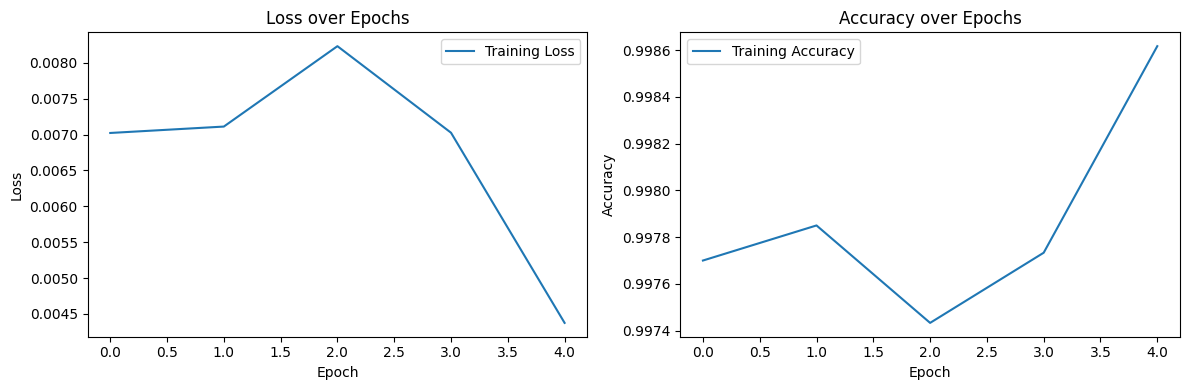

In [11]:
# 손실과 정확도 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

MNIST 분류기의 성능을 높이기 위해 다양한 방법을 시도해 볼 수 있습니다. 몇 가지 개선 방법을 제안해드리겠습니다:

더 깊은 신경망 구조: Sequential 모델에 더 많은 은닉층을 추가하거나, 더 많은 유닛을 가진 은닉층을 사용하여 신경망을 확장할 수 있습니다. 이를 통해 모델이 데이터의 더 복잡한 패턴을 학습할 수 있게 될 수 있습니다.

합성곱 신경망 (Convolutional Neural Network, CNN): MNIST는 이미지 데이터이므로, CNN 구조를 적용하여 성능을 향상시킬 수 있습니다. Conv2D 레이어와 MaxPooling2D 레이어를 사용하여 CNN을 구성하고, Flatten 레이어 이후에 Dense 레이어를 추가할 수 있습니다.

정규화 (Normalization): 모델의 안정성과 학습 속도를 향상시키기 위해 배치 정규화 (BatchNormalization) 레이어를 추가할 수 있습니다. 이를 통해 학습 과정의 안정성을 높이고, 일반화 성능을 향상시킬 수 있습니다.

드롭아웃 (Dropout): 과적합을 줄이기 위해 드롭아웃 레이어 (Dropout)를 추가하여 일부 유닛을 임의로 비활성화할 수 있습니다. 이를 통해 모델이 일반화 능력을 향상시킬 수 있습니다.

옵티마이저 및 학습률 조정: 옵티마이저를 변경하거나 학습률을 조정하여 최적화 과정을 개선할 수 있습니다. 예를 들어, Adam 옵티마이저 대신 RMSprop이나 SGD 등 다른 옵티마이저를 시도해 볼 수 있습니다. 또한, 학습률 스케줄링 등을 통해 학습률을 동적으로 조정할 수도 있습니다.

데이터 증강 (Data Augmentation): MNIST 데이터셋에 대해 데이터 증강 기법을 적용하여 학습 데이터를 다양하게 변형할 수 있습니다. 회전, 이동, 확대/축소 등의 변환을 적용하여 데이터의 다양성을 높이고 일반화 성능을 향상시킬 수 있습니다.

합성곱 레이어와 풀링 레이어 추가: Conv2D와 MaxPooling2D 레이어를 사용하여 이미지에 대한 합성곱과 최대 풀링을 수행합니다.

배치 정규화 (Batch Normalization): BatchNormalization 레이어를 추가하여 모델의 안정성과 학습 속도를 향상시킵니다.

드롭아웃 (Dropout): Dropout 레이어를 추가하여 과적합을 줄입니다.

입력 데이터 차원 변경: train_images와 test_images의 차원을 (28, 28)에서 (28, 28, 1)로 변경하여 모델에 맞는 형태로 입력합니다.

위의 코드를 실행하면 개선된 모델로 MNIST 데이터셋을 학습하고, 테스트 데이터에 대한 정확

In [14]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

# 모델 구성
model2 = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [15]:

# 모델 컴파일
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0


In [18]:

# 모델 학습
history2 = model2.fit(train_images[..., tf.newaxis], train_labels, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 22s 44ms/step - loss: 0.3024 - accuracy: 0.9070
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0925 - accuracy: 0.9726
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0706 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0558 - accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0459 - accuracy: 0.9864
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0404 - accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0372 - accuracy: 0.9885
Epoch 8/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0314 - accuracy: 0.9907
Epoch 9/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 10/10
469/469 [==============================] - 20s 43ms/step - loss: 0.025

In [19]:

# 테스트 데이터에 대한 정확도 평가
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9806
Test accuracy: 0.9805999994277954


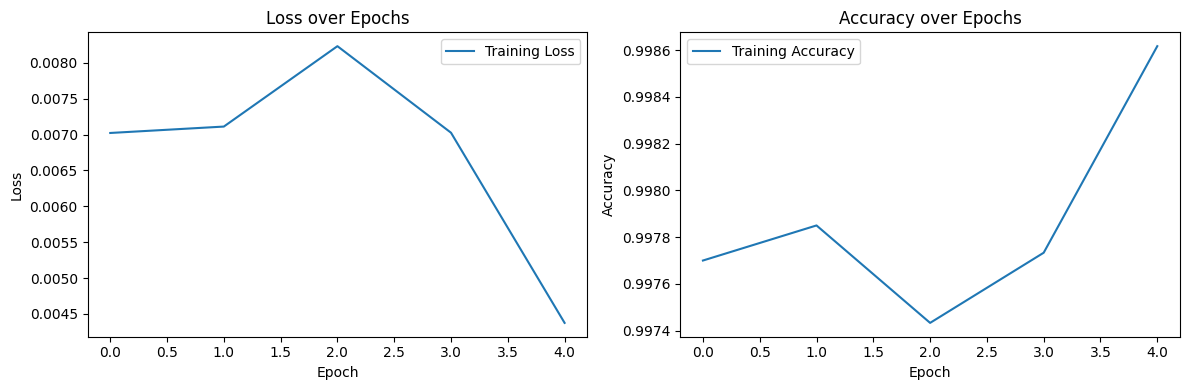

In [20]:

# 손실과 정확도 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()